# Trabajo práctico Nro 3: Ondas de superficie

Materia: Hidrodinámica de cuerpos de agua - 2017

Alumno: Emiliano López

## 1.a)

Calculamos la velocidades horizontal y vertical de las partículas $u$ y $w$, y las aceleraciones $a_x$ y $a_z$ a una profundidad de 5m debajo de la superficie cuando $\theta = 2\pi x/L - 2\pi t/T = \pi/3$

La teoría de Airy define la función potencial $\phi$ -tomando la parte real- del siguiente modo:

$$\phi (x,z,t) = \frac{gA}{\omega} \frac{cosh[k(h+z)]}{cosh(kh)}cos(kx -\omega t)$$

Calculamos las velocidades u y w:

$$ u = \frac{\partial \phi}{\partial x} = -\frac{gA}{\omega}k \frac{cosh[k(h+z)]}{cosh(kh)}sin(kx -\omega t)$$

$$ w = \frac{\partial \phi}{\partial z} = \frac{gA}{\omega}k \frac{senh[k(h+z)]}{cosh(kh)}cos(kx -\omega t)$$

Calculamos las aceleraciones $a_x$ y $a_z$:

$$a_x = \frac{\partial u}{\partial t} = gAk \frac{cosh[k(h+z)]}{cosh(kh)}cos(kx -\omega t)$$


$$a_z = \frac{\partial w}{\partial t} = gAk \frac{senh[k(h+z)]}{cosh(kh)}sen(kx -\omega t)$$

Utilizando los datos del problema: 
- Período T = 8s 
- Altura A = 5m 
- Profundidad $h_0=15m$
- $\omega = 2\pi/T$

debemos calcular el valor del **número de ondas** $k$.

Utilizando la relación de dispersión $\omega^2 = gk \tanh(kh_0)$ y renombrando $y=kh_0$, obtenemos:

$$\omega^2 = g \frac{y}{h_0} \tanh(y)$$

$$\underbrace{\frac{\omega^2h_0}{g}}_{B=0.94319} = y \tanh(y)$$

$$y = \frac{B}{tanh(y)}$$

Esta última ecuación debe resolverse en forma iterativa:

$$y^{(k+1)} = \frac{B}{tanh(y^{(k)})}$$

In [5]:
from math import tanh, pi
B = (((2*pi/8)**2)*15)/9.81
y = 5
for i in range(10):
    y = B / tanh(y)
k = y/15
print("k = ", k)

k =  0.07683784592973232


In [14]:
from math import cosh, sinh, sin, cos, pi

u = ((-9.8*5*k)/(pi/4))*((cosh(k*10))/(cosh(k*15)))*sin(pi/3)
v = ((9.8*5*k)/(pi/4))*((sinh(k*10))/(cosh(k*15)))*cos(pi/3)
ax = (9.8*5*k)*(cosh(k*10)/cosh(k*15))*cos(pi/3)
az = (9.8*5*k)*(sinh(k*10)/cosh(k*15))*sin(pi/3)
print("u = ",u)
print("v = ",v)
print("ax = ",ax)
print("az = ",az)
print("Longitud de onda: ", 2*pi/k)

u =  -3.1273627603175735
v =  1.1680852911607444
ax =  1.418102146598446
az =  1.5890042688590242
Longitud de onda:  81.59980918415047


por lo que $y^{(10)} = 0.259512$ de modo que $k = y^{(10)}/h_0 = 0.077$

Con los valores calculados y los datos del problema obtenemos las velocidades y aceleraciones:

$$u = \frac{-9.8[m/s^2]*5[m]*0.077[1/m]}{\pi/4 [1/s]}*\frac{cosh(0.077[1/m]*(15[m]-5[m]))}{cosh(0.077[1/m]*15[m])}*sen(\pi/3) =-3.1237 [m/s]$$

$$v = \frac{9.8[m/s^2]*5[m]*0.077[1/m]}{\pi/4 [1/s]}*\frac{senh(0.077[1/m]*(15[m]-5[m]))}{cosh(0.077[1/m]*15[m])}*cos(\pi/3) = 1.1650 [m/s]$$

$$a_x = 9.8[m/s^2]*5[m]*0.077[1/m]*\frac{cosh(0.077[1/m]*(15[m]-5[m]))}{cosh(0.077[1/m]*15[m])}*cos(\pi/3) = 1.4164 [m/s^2]$$

$$a_z = 9.8[m/s^2]*5[m]*0.077[1/m]*\frac{senh(0.077[1/m]*(15[m]-5[m]))}{cosh(0.077[1/m]*15[m])}*sen(\pi/3) = 1.5848 [m/s^2]$$

Con el valor del numero de onda (k) podemos calcular la longitud de onda:

$$k = \frac{2\pi}{\lambda}$$

$$0.077 = \frac{2\pi}{\lambda}$$

$$\lambda = \frac{2\pi}{0.077} = 81.7 [m]$$

## 1.b) Trayectorias teórica de las partículas

Las expresiones de velocidad pueden ser integradas en el tiempo para obtener los valores de la trayectoria, esto es:

- Desplazamiento horizontal:

$$\zeta = \int u dt = \frac{gA}{\omega^2}k \frac{cosh[k(h+z)]}{cosh(kh)}cos(kx -\omega t)$$

- Desplazamiento vertical:

$$\varepsilon = \int w dt = -\frac{gA}{\omega^2}k \frac{senh[k(h+z)]}{cosh(kh)}sin(kx -\omega t)$$

Estas ecuaciones nos dan la posición relativa de la partícula respecto de un punto en función de la posición *x*, y del tiemo *t*. 

Elevando y sumando estas expresiones al cuadrado, encontraremos la ecuación que representa la trayectoria de las partículas. Si además las dividimos por máximo valor en x y z, obtenemos la siguiente ecuación:

$$\frac{\zeta^2}{B^2} + \frac{\varepsilon^2}{C^2} = 1$$

que claramente es la ecuacion de una elipse, por lo que las partículas de agua conforman órbitas cerradas, cuyos semiejes horizontal y vertical son respectivamente:

$$ B =A \frac{cosh[k(h+z)]}{cosh(kh)}$$

$$ C = -A \frac{senh[k(h+z)]}{cosh(kh)}$$

### Para aguas intermedias

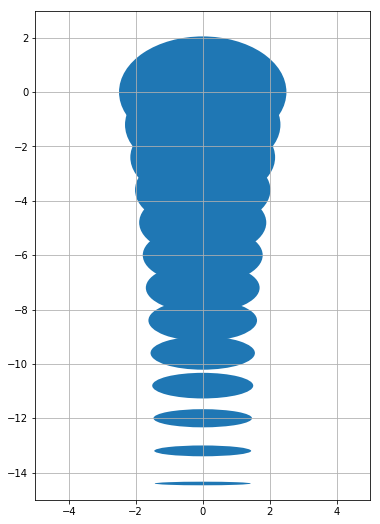

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

z = np.arange(0,-15, -1.2)
k, h, A = 0.077, 15, 5
B =  A * np.cosh(k*(h+z)) / np.cosh(k*h)
C = -A * np.sinh(k*(h+z)) / np.cosh(k*h)

ells = [Ellipse((0, Z), b, c) for Z,b,c in zip(z,B,C)]
fig = plt.figure(figsize=(6, 9))
a = plt.subplot(111)

for e in ells:
    e.set_clip_box(a.bbox)
    a.add_artist(e)
    
plt.xlim(-5, 5)
plt.ylim(-15, 3)
plt.grid()
plt.show()

### Para aguas profundas

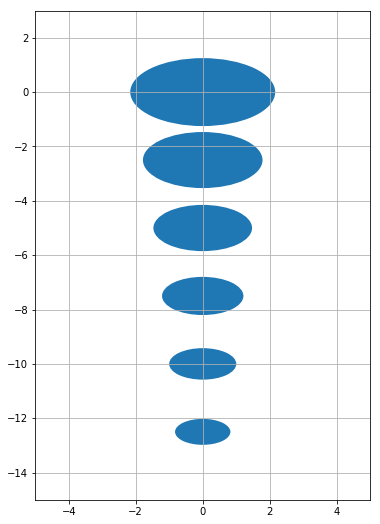

In [12]:
z = np.arange(0,-15, -2.5)
k, h, A = 0.077, 15, 5
B =  A * np.exp(k*z)*np.sin(np.pi/3)
C = A * np.exp(k*z)*np.cos(np.pi/3)

ells = [Ellipse((0, Z), b, c) for Z,b,c in zip(z,B,C)]
fig = plt.figure(figsize=(6, 9))
a = plt.subplot(111)

for e in ells:
    e.set_clip_box(a.bbox)
    a.add_artist(e)
    
plt.xlim(-5, 5)
plt.ylim(-15, 3)
plt.grid()
plt.show()

### Para aguas someras

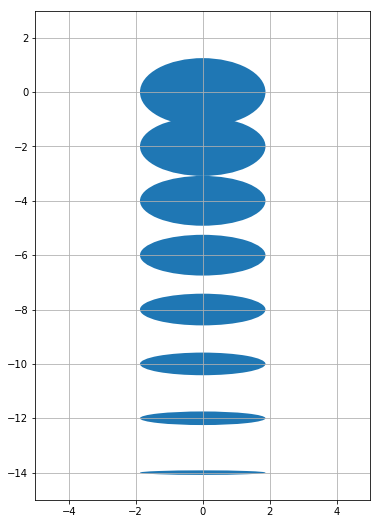

In [13]:
z = np.arange(0,-15, -2)
k, h, A = 0.077, 15, 5
B =  -A * 1/(k*h)*np.sin(np.pi/3)
C = A * (1+z/h) * np.cos(np.pi/3)

ells = [Ellipse((0, Z), B, c) for Z,c in zip(z,C)]
fig = plt.figure(figsize=(6, 9))
a = plt.subplot(111)

for e in ells:
    e.set_clip_box(a.bbox)
    a.add_artist(e)
    
plt.xlim(-5, 5)
plt.ylim(-15, 3)
plt.grid()
plt.show()

## 2) Evaluamos la relación entre los términos no lineales y lineales

$$\frac{no\; lineal}{lineal} = \frac{uu_x}{u_t}$$



Tenemos:

- $ u = \frac{\partial \phi}{\partial x} = -\frac{gA}{\omega}k \frac{cosh[k(h+z)]}{cosh(kh)}sen(kx -\omega t)$

- $ u_x = \frac{\partial u}{\partial x} = -\frac{gA}{\omega}k^2 \frac{cosh[k(h+z)]}{cosh(kh)}cos(kx -\omega t)$

- $u_t = \frac{\partial u}{\partial t} = gAk \frac{cosh[k(h+z)]}{cosh(kh)}cos(kx -\omega t)$


Operamos el cociente entre los términos no lineales y lineales y obtenemos:

$$\frac{\frac{gA}{\omega}k \frac{cosh[k(h+z)]}{cosh(kh)}sen(kx -\omega t)\frac{gA}{\omega}k^2 \frac{cosh[k(h+z)]}{cosh(kh)}cos(kx -\omega t)}{gAk \frac{cosh[k(h+z)]}{cosh(kh)}cos(kx -\omega t)}$$

Cancelando los términos correspodnientes nos queda:

$$\frac{1}{\omega}sen(kx-\omega t)\frac{gA}{\omega}k^2\frac{cosh[k(h+z)]}{cosh(kh)}=$$

$$ = \frac{Agk^2}{\omega^2}sen(kx-\omega t)\frac{cosh[k(h+z)]}{cosh(kh)}$$

Para z=0, obtenemos que la relación es:

$$= \frac{Agk^2}{\omega^2}sen(kx-\omega t)$$

La restricción para el caso de aguas poco profundas, donde $kh\ll1$, la relación de dispersión nos da que $\omega^2\approx gh k^2$, debido a que $kh \to 0 (\ll1)$ y que $tanh(kh) \to kh$.

Por lo que la relación entre los términos despreciados (no lineales) y retenidos (lineales) debe estar acotada, es decir, converger a un valor despreciable, esto es:

$$\frac{A}{h}sen(kx-\omega t) \ll 1$$

Debido a que la funcion seno es una función periódica acotada entre $\pm1$, podemos concluir que $A\ll h$.